In [1]:
from pathlib import Path
import cv2
import sys
import numpy as np
from skimage import feature, measure
import livecellx
from livecellx.core import datasets
from livecellx.core.datasets import LiveCellImageDataset
import livecellx.segment
from livecellx import core
import livecellx.core.utils
from tqdm import tqdm
import json
from livecellx.core import (
    SingleCellTrajectory,
    SingleCellStatic,
    SingleCellTrajectoryCollection,
)
import livecellx.trajectory.contour.contour_class
import matplotlib.pyplot as plt
from livecellx.trajectory import feature_extractors
traj_collection_json_path = "../datasets/test_data/traj_analysis/track_singleCellTrajectoryCollection.json"
traj_collection_json = json.load(open(traj_collection_json_path, "r"))
trajectory_collection = SingleCellTrajectoryCollection().load_from_json_dict(traj_collection_json)

## Subset trajectory track ids

In [2]:
trajectory_collection.get_track_ids()[:10]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [3]:
trajectory_collection.subset(range(1, 6)).get_track_ids()

[1, 2, 3, 4, 5]

In [4]:
trajectory_collection.subset_random(5).get_track_ids()

[3, 5, 11, 16, 27]

In [5]:
trajectory_collection[1].get_sc_napari_shapes()

[[[0, 1294.5, 1164.5],
  [0, 1294.5, 1477.5],
  [0, 1567.5, 1477.5],
  [0, 1567.5, 1164.5]],
 [[1, 1295.6817736850767, 1161.2969654515127],
  [1, 1295.6817736850767, 1478.7032343087749],
  [1, 1573.3175271539167, 1478.7032343087749],
  [1, 1573.3175271539167, 1161.2969654515127]],
 [[2, 1296.2285522856919, 1165.9755290801193],
  [2, 1296.2285522856919, 1476.7303870176272],
  [2, 1571.300538944855, 1476.7303870176272],
  [2, 1571.300538944855, 1165.9755290801193]]]

## Visualization

timeframe: 3 larger than the last timeframe of the trajectory, stopping...


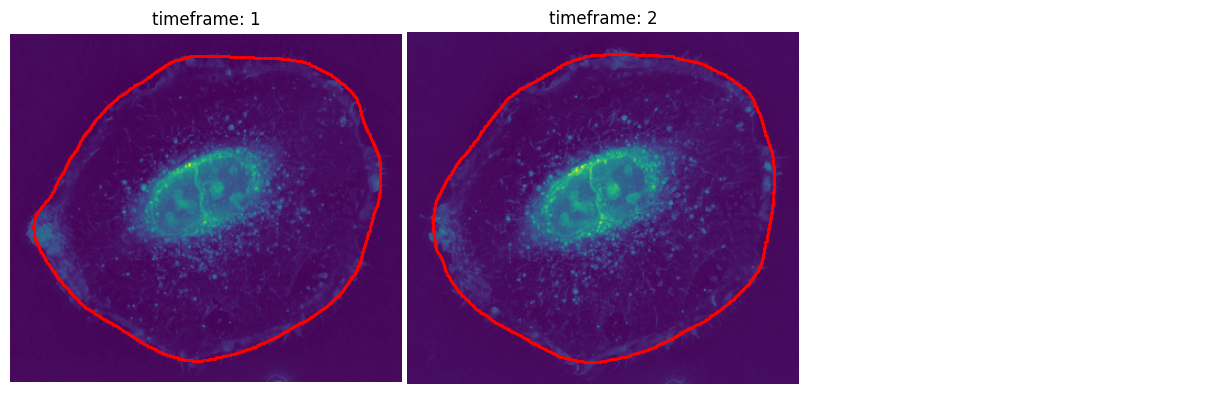

In [6]:
from livecellx.core.visualizer import Visualizer
Visualizer.show_trajectory_on_grid(trajectory_collection[1], nc=3)

saving to: ./notebook_results/test_data/track_results/track_29.mp4...
saving to: ./notebook_results/test_data/track_results/track_28.mp4...
saving to: ./notebook_results/test_data/track_results/track_27.mp4...
saving to: ./notebook_results/test_data/track_results/track_26.mp4...
saving to: ./notebook_results/test_data/track_results/track_25.mp4...
saving to: ./notebook_results/test_data/track_results/track_24.mp4...
saving to: ./notebook_results/test_data/track_results/track_23.mp4...
saving to: ./notebook_results/test_data/track_results/track_22.mp4...
saving to: ./notebook_results/test_data/track_results/track_21.mp4...
saving to: ./notebook_results/test_data/track_results/track_20.mp4...
saving to: ./notebook_results/test_data/track_results/track_19.mp4...
saving to: ./notebook_results/test_data/track_results/track_18.mp4...
saving to: ./notebook_results/test_data/track_results/track_17.mp4...
saving to: ./notebook_results/test_data/track_results/track_16.mp4...
saving to: ./noteboo

/home/ke/LiveCellTracker-dev/livecellx/track/movie.py:62: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


saving to: ./notebook_results/test_data/track_results/track_9.mp4...
saving to: ./notebook_results/test_data/track_results/track_8.mp4...
saving to: ./notebook_results/test_data/track_results/track_7.mp4...
saving to: ./notebook_results/test_data/track_results/track_6.mp4...
saving to: ./notebook_results/test_data/track_results/track_5.mp4...
saving to: ./notebook_results/test_data/track_results/track_4.mp4...
saving to: ./notebook_results/test_data/track_results/track_3.mp4...
saving to: ./notebook_results/test_data/track_results/track_2.mp4...
saving to: ./notebook_results/test_data/track_results/track_1.mp4...
saving to: ./notebook_results/test_data/track_results/track_31.mp4...


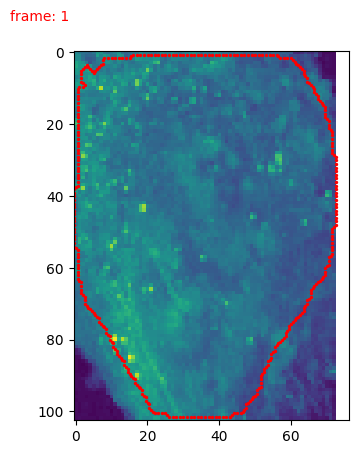

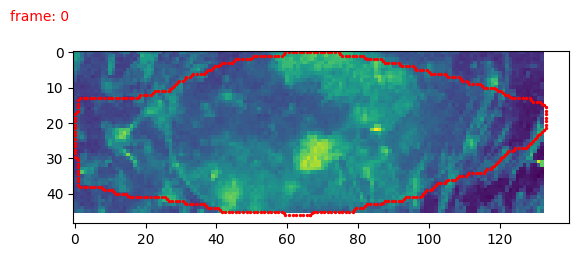

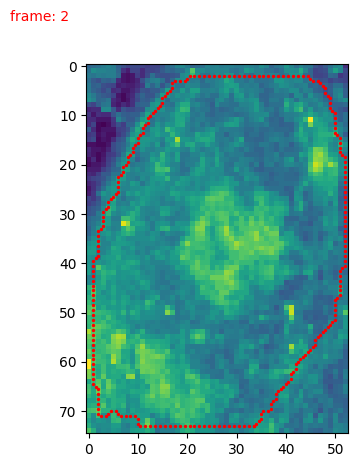

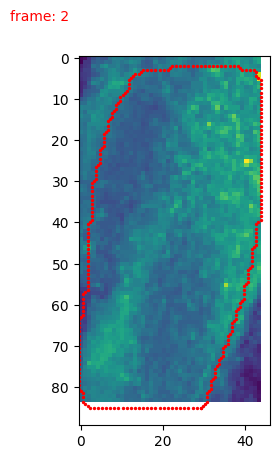

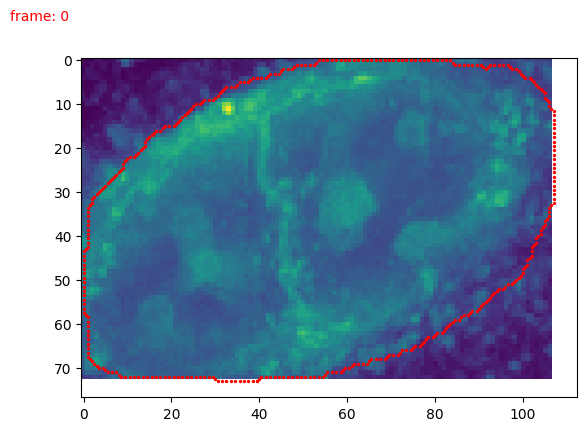

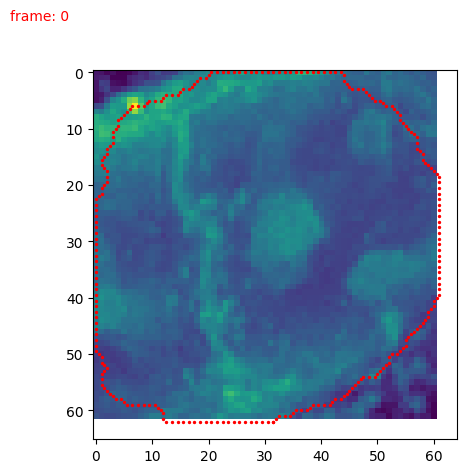

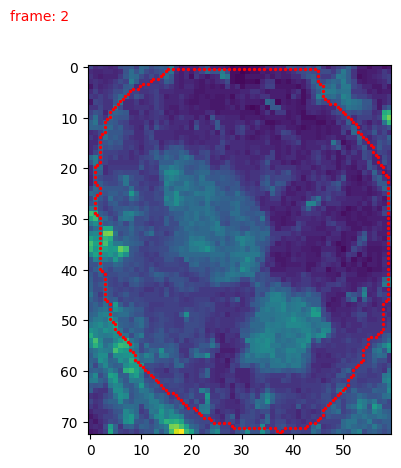

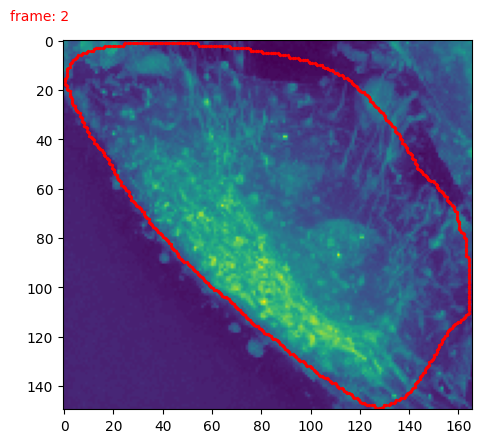

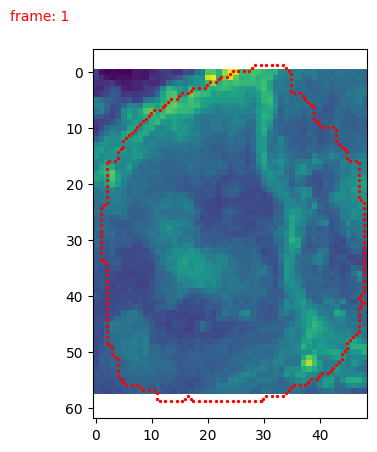

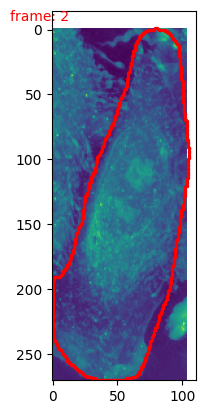

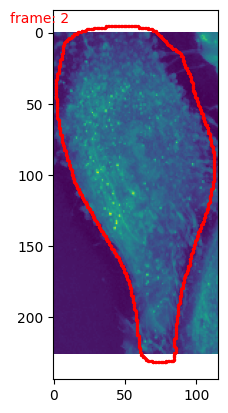

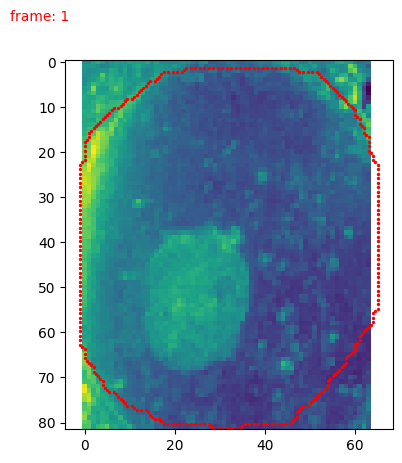

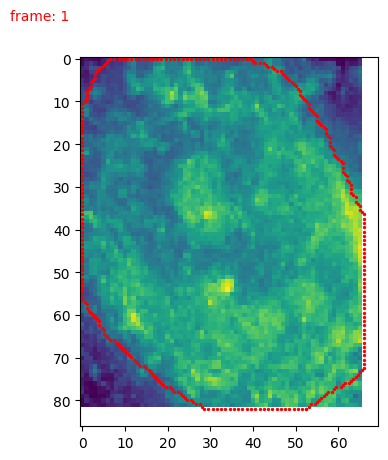

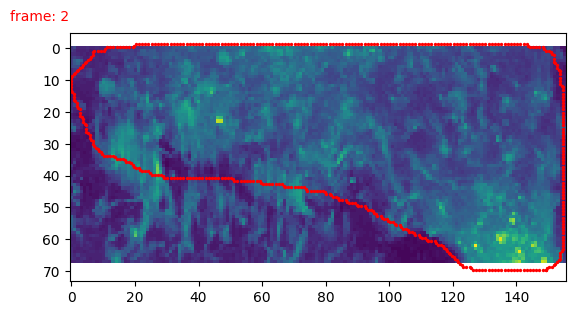

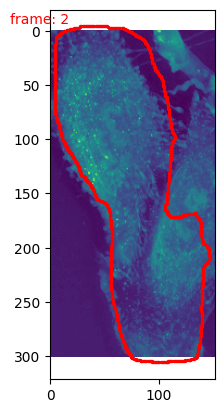

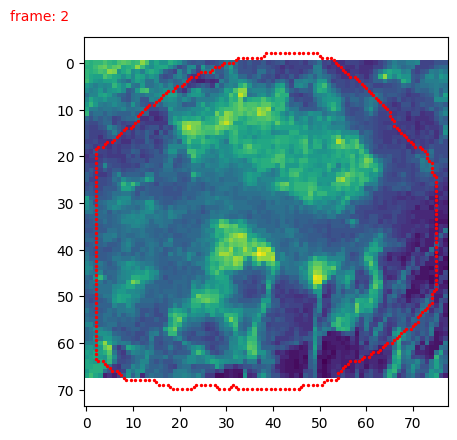

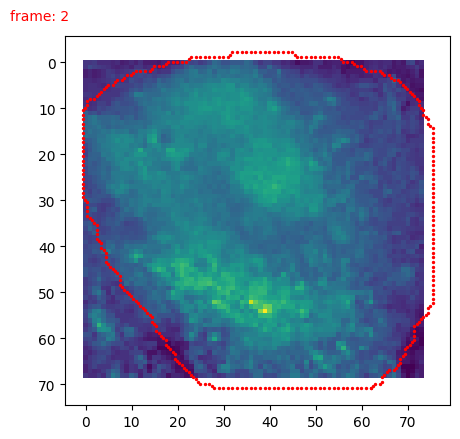

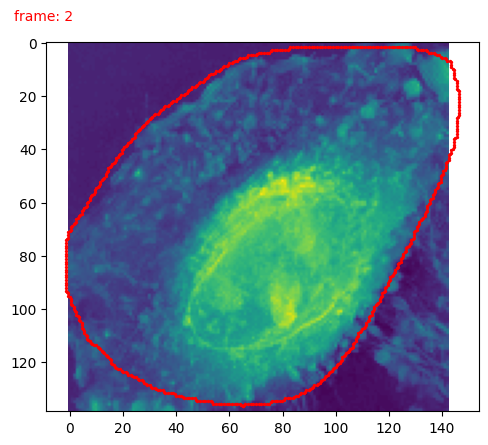

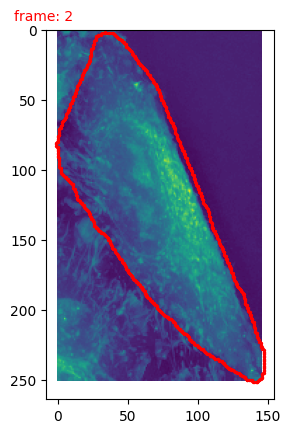

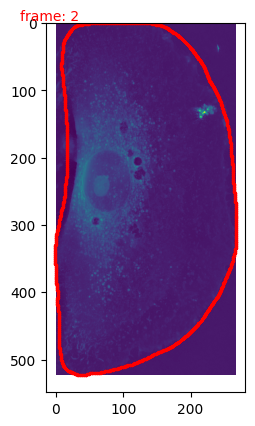

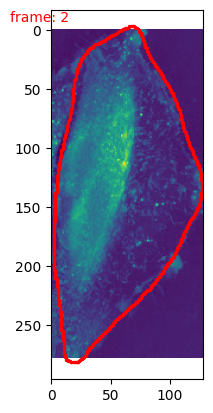

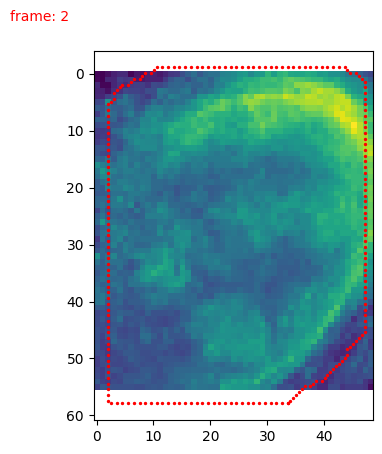

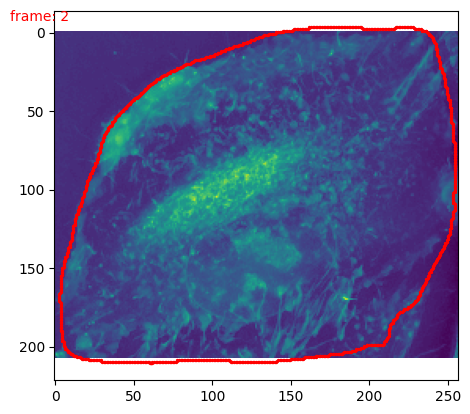

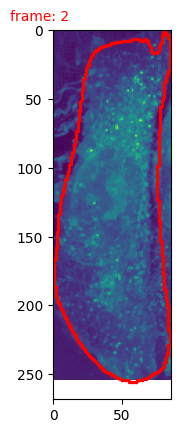

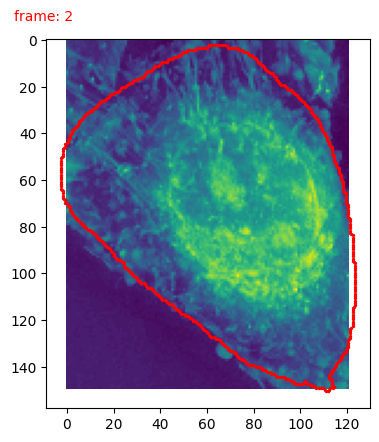

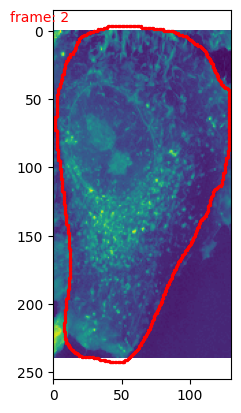

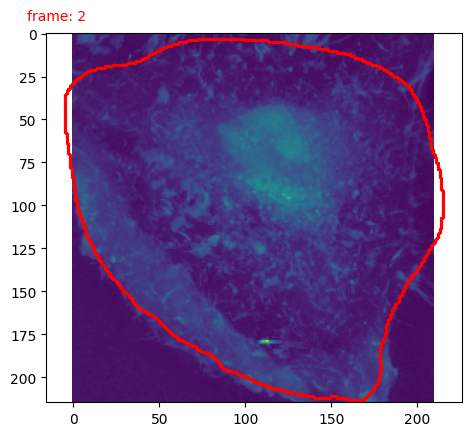

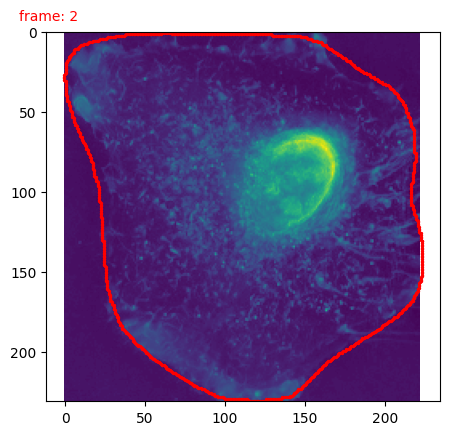

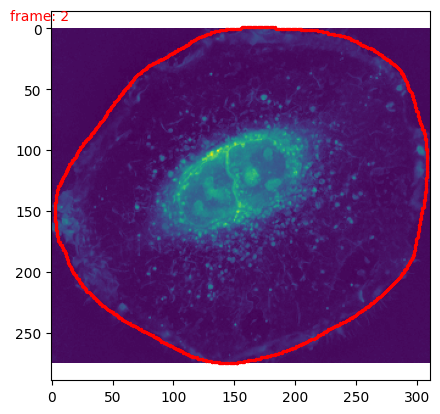

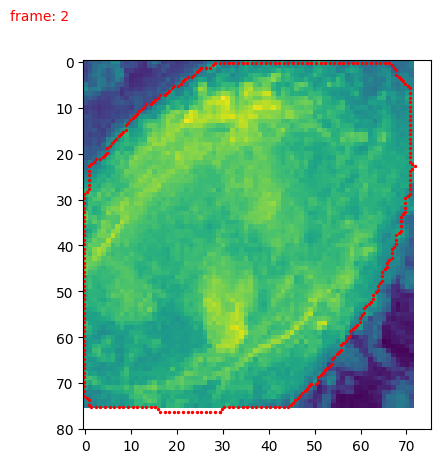

In [7]:
from livecellx.track.movie import generate_single_trajectory_movie

for track_id, traj in trajectory_collection:
    generate_single_trajectory_movie(traj, save_path=f"./notebook_results/test_data/track_results/track_{track_id}.mp4")